In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
from PIL import Image
import urllib

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("data/brighton_xg_soc_tutorial_06092022.csv")
team_name = "Brighton & Hove Albion"

df = df.drop(columns=['Unnamed: 0'])
home_df = df.copy()
home_df = home_df.melt(id_vars=["date", "home_team_name", "away_team_name"])
home_df["venue"] = "H"
home_df.rename(columns={"home_team_name": "team",
               "away_team_name": "opponent"}, inplace=True)
home_df.replace({"variable": {"home_team_xG": "xG_for",
                "away_team_xG": "xG_ag"}}, inplace=True)

away_df = df.copy()
away_df = away_df.melt(id_vars=["date", "away_team_name", "home_team_name"])
away_df["venue"] = "A"
away_df.rename(columns={"away_team_name": "team",
               "home_team_name": "opponent"}, inplace=True)
away_df.replace({"variable": {"away_team_xG": "xG_for",
                "home_team_xG": "xG_ag"}}, inplace=True)

df = pd.concat([home_df, away_df]).reset_index(drop=True)


In [3]:
# filter brighton data
df = df[df["team"] == team_name].reset_index(drop=True)
df = df.sort_values(by="date")

# xg conceded and created
Y_for = df[df["variable"] == "xG_for"].reset_index(drop=True)
Y_ag = df[df["variable"] == "xG_ag"].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

# rolling average

Y_for = Y_for.rolling(window=10, min_periods=0).mean()
Y_ag = Y_ag.rolling(window=10, min_periods=0).mean()


C:\Users\user\AppData\Local\Temp\ipykernel_32252\1537693655.py:12: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'opponent', 'team', 'variable', 'venue'], dtype='object')
  Y_for = Y_for.rolling(window=10, min_periods=0).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_32252\1537693655.py:13: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'opponent', 'team', 'variable', 'venue'], dtype='object')
  Y_ag = Y_ag.rolling(window=10, min_periods=0).mean()


(-0.5, 191.5, 191.5, -0.5)

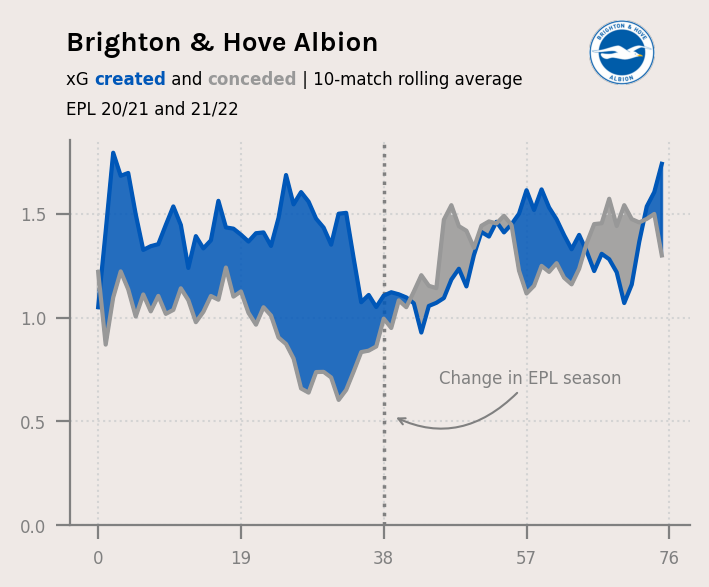

In [4]:
fig = plt.figure(figsize=(4, 2.5), dpi=200, facecolor="#EFE9E6")
ax = plt.subplot(111, facecolor="#EFE9E6")

# remove top & right spine and change color
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# set the grid
ax.grid(
    visible=True,
    lw=.75,
    ls=":",
    color="lightgrey"
)

line_1 = ax.plot(X, Y_for, color="#0057B8", zorder=4)
line_2 = ax.plot(X, Y_ag, color="#989898", zorder=4)

ax.set_ylim(0)

# division line between seasons
ax.plot(
    [38, 38],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls=":",
    lw=1.25,
    color="grey",
    zorder=2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy=(38, .55),
    xytext=(20, 10),
    textcoords="offset points",
    text="Change in EPL season",
    size=6,
    color="grey",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="grey",
        linewidth=.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    )
)

# fill between
ax.fill_between(
    X,
    Y_ag["value"],
    Y_for["value"],
    where=Y_for["value"] >= Y_ag["value"],
    interpolate=True,
    alpha=.85,
    zorder=3,
    color=line_1[0].get_color()
)

ax.fill_between(
    X,
    Y_ag["value"],
    Y_for["value"],
    where=Y_ag["value"] > Y_for["value"],
    interpolate=True,
    alpha=.85,
    # zorder=3
    color=line_2[0].get_color()
)

# customize the ticks
ax.tick_params(
    color="grey",
    length=5,
    which="major",
    labelsize=6,
    labelcolor="grey",
    zorder=3
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))

# Title and subtitle for legend
fig_text(
    x=.12,
    y=1.1,
    s=team_name,
    color="black",
    weight="bold",
    size=10,
    family="Karla",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=.12,
    y=1.02,
    s="xG <created> and <conceded> | 10-match rolling average\nEPL 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight":"bold"},
        {"color": line_2[0].get_color(), "weight":"bold"}
    ],
    color="black",
    size=6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([.75, .99, .13, .13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}10204.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")


In [5]:
import matplotlib as mpl
print(mpl.get_cachedir())

C:\Users\user\.matplotlib
